In [1]:
from __future__ import division
%pylab inline
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


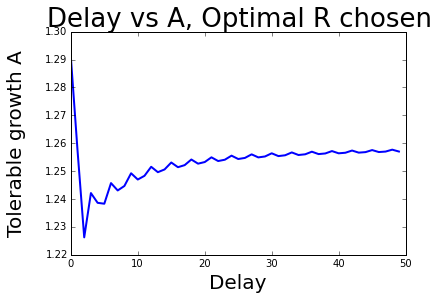

In [2]:
# Delay vs A; Old Model; No V(n); Drop Probability = 0.5^(redundancy + 1)

lst = []
for D in range(50):
    b = 1 # bits per unit time across channel
    code = (D+1)*b # number of bits in code
    R = linspace(1, code, code) # type: ndarray

    mu_c = 1
    varc = 2**(-2*R)

    drop_pr = 0.5**(code-R+1) #0 # 1-asarray(ccdf(code, 0.5))

    z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
    a = z**(1/(2*(D+1)))
    lst.append(max(a)) 
# k = log(z)/(2*log(a))

figure()
plot(range(50),lst,linewidth=2.0)
xlabel('Delay',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)

title('Delay vs A, Optimal R chosen', fontsize=26)
# savefig('old_delayvsa.pdf')

In [ ]:
# Delay vs A; Old Model; No V(n); Drop Probability = Binomial

# See SIM/SIM2_151122.ipynb for my explorations

## No V(n), $\gamma = 1$

$$ \alpha = \frac{a^D \mu_c}{\mu_c^2 + \sigma_c^2} $$
$$ a^{2(D+1)} < \frac{\mu_c^2 + \sigma_c^2}{\sigma_c^2} \quad \quad a < \left( \frac{\mu_c^2 + \sigma_c^2}{\sigma_c^2} \right)^{\frac{1}{2(D+1)}} $$

Where $\gamma$ = Pr(message == success)

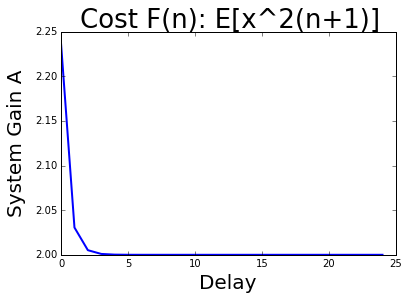

In [15]:
# Delay vs A; No V(n); Drop Probability = 0
# Bound might be too loose

lst = []
for D in range(25):
    b = 1 # bits per unit time across channel
    code = (D+1)*b # number of bits in code

    mu_c = 1
    varc = 2**(-2*code)
    
    a = ((mu_c**2 + varc) / varc)**(1/2/(D+1))
    lst.append(a)

plot(range(25),lst,linewidth=2.0)
xlabel('Delay',fontsize=20), ylabel('System Gain A',fontsize=20, labelpad=10)

title('Cost F(n): E[x^2(n+1)]', fontsize=26)
savefig('160131_oldcost.pdf', bbox='tight')

## V(n), $\gamma = 1$

$$ \alpha(n) = \frac{a^D \mu_c \sigma_{x(n-D)}^2}{(\mu_c^2 + \sigma_c^2) \sigma_{x(n-D)}^2 + \sigma_v^2} $$

$$ a^{2(D+1)} \left( 1 - 2\alpha(n) \mu_c + \alpha^2(n) (\mu_c^2 + \sigma_c^2) \right) < 1 $$

$$ a^{2(D+1)} \left( 1 - \frac{2\mu_c^2 \sigma^2_{x(n-D)}}{(\mu_c^2+\sigma_c^2) \sigma^2_{x(n-D)} + \sigma_v^2} + \frac{\mu_c^2 \sigma^4_{x(n-D)} (\mu_c^2 + \sigma_c^2)}{((\mu_c^2 + \sigma_c^2) \sigma^2_{x(n-D)} + \sigma_v^2 )^2} \right) < 1 $$

$$ \lim_{\sigma_{x(n-D)}^2 \rightarrow \infty} \left( 1 - \frac{2\mu_c^2 \sigma^2_{x(n-D)}}{(\mu_c^2+\sigma_c^2) \sigma^2_{x(n-D)} + \sigma_v^2} + \frac{\mu_c^2 \sigma^4_{x(n-D)} (\mu_c^2 + \sigma_c^2)}{((\mu_c^2 + \sigma_c^2) \sigma^2_{x(n-D)} + \sigma_v^2 )^2} \right) = 1 - \frac{2\mu_c^2}{\mu_c^2 + \sigma_c^2} + \frac{\mu_c^2}{\mu_c^2 + \sigma_c^2} = 1 - \frac{\mu_c^2}{\mu_c^2 + \sigma_c^2} = \frac{\sigma_c^2}{\mu_c^2+\sigma_c^2} $$

* First plot: Decreasing V(n) Increases A
    - Decreasing V(n) to 0 gives the same results as not having V(n) (sanity check pass)
    - The curvature changes as an effect of $\sigma^2_{x(n-D)}$, which makes sense as that determines effect of $\sigma^2_v$ asymptotically
    
    
* Second plot: Increasing $\sigma^2_{x(n-D)}$ Increases A (positive feedback)
    - $\sigma^2_{x(n-D)} \rightarrow \infty \implies A \rightarrow 2.0$
  
  
* Third plot: Delay vs A for a fixed observation noise $\sigma_v^2$


* Fourth plot: Delay vs A for various observation noises $\sigma_v^2$
    - Note the reason it doesn't look like it asympotes is an artifact from having large non-infinite sigmax

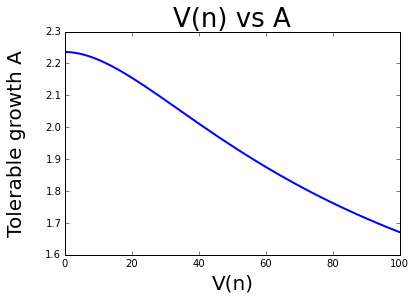

In [113]:
# V(n) vs A; Drop Probability = 1 --> Sanity Check (Good!)

D = 0
sigmax = 100 # the difference between 100, 1000 and 10000
                # the curvature changes as a result of how far out v(n) goes
                # because it changes how important v(n) is to asymptotic behavior
b = 1 # bits per unit time across channel
code = (D+1)*b # number of bits in code
mu_c = 1
varc = 2**(-2*code)
varv = linspace(0, 100, 101)
# a = ((mu_c**2 + varc) / varc)**(1/2/(D+1))


alpha = mu_c * sigmax / ((mu_c**2+varc)*sigmax + varv)

first = 1
second = -2*mu_c*alpha
third = alpha**2 * (mu_c**2 + varc)
# second = -2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + varv)
# third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + varv)**2
res = first+second+third
res = (1/res)**(1/2/(D+1))

figure()
plot(varv,res,linewidth=2.0)
xlabel('V(n)',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)

title('V(n) vs A', fontsize=26)
# savefig('delayvsa.pdf')

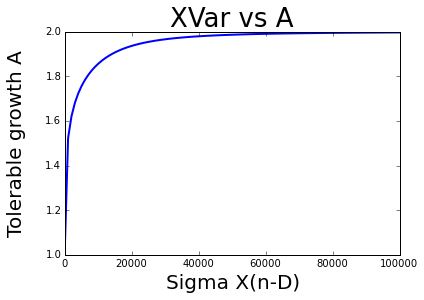

In [114]:
# Sigmax vs A; Drop Probability = 1 --> Sanity Check (Good!) 
# Varx -> Infinity ==> Bounded at A=2
# That makes sense since my varc = 2**(-2*code) << exponential by 2

D = 10
varv = 10 # look at 0
b = 1 # bits per unit time across channel
code = (D+1)*b # number of bits in code
mu_c = 1
varc = 2**(-2*code)
sigmax = linspace(1, 100000, 100)
# a = ((mu_c**2 + varc) / varc)**(1/2/(D+1))

alpha = mu_c * sigmax / ((mu_c**2+varc)*sigmax + varv)

first = 1
second = -2*mu_c*alpha
third = alpha**2 * (mu_c**2 + varc)
# second = -2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + varv)
# third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + varv)**2
res = first+second+third
res = (1/res)**(1/2/(D+1))

figure()
plot(sigmax,res,linewidth=2.0)
xlabel('Sigma X(n-D)',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)

title('XVar vs A', fontsize=26)
# savefig('delayvsa.pdf')

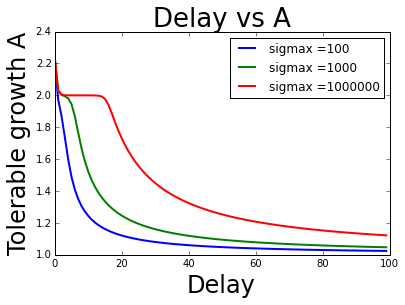

In [15]:
# Delay vs A; Drop Probability = 1 

varv = 10 # look at 0
mu_c = 1
for sigmax in [100, 1000, 1000000]:
    lst = []
    for D in range(100):
        b = 1 # bits per unit time across channel
        code = (D+1)*b # number of bits in code
        varc = 2**(-2*code)
    #     sigmax = linspace(1, 100000, 100)
    #         sigmax = 1000000
        # a = ((mu_c**2 + varc) / varc)**(1/2/(D+1))

        alpha = mu_c * sigmax / ((mu_c**2+varc)*sigmax + varv)

        first = 1
        second = -2*mu_c*alpha
        third = alpha**2 * (mu_c**2 + varc)
    #     second = 2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + varv)
    #     third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + varv)**2
        res = first+second+third
        res = (1/res)**(1/2/(D+1))
        lst.append(res)
    #     lst.append(max(res))
#     print(len(lst))
    plot(range(100),lst,lw=2.0, label='sigmax ='+str(sigmax))
xlabel('Delay',fontsize=24), ylabel('Tolerable growth A',fontsize=24)
legend()
title('Delay vs A', fontsize=26)
# savefig('delayvsa.pdf')

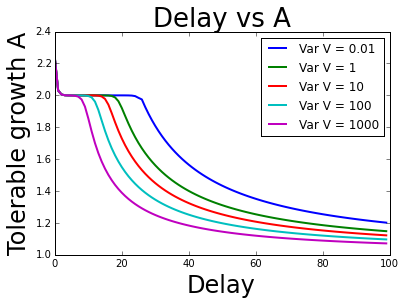

In [6]:
# Delay vs A; Drop Probability = 1 

mu_c = 1
for varv in [0.01, 1, 10, 100, 1000]:
    lst = []
    for D in range(100):
        b = 1 # bits per unit time across channel
        code = (D+1)*b # number of bits in code
        varc = 2**(-2*code)
#         sigmax = linspace(1, 100000, 100)
        sigmax = 1000000
        # a = ((mu_c**2 + varc) / varc)**(1/2/(D+1))

        alpha = mu_c * sigmax / ((mu_c**2+varc)*sigmax + varv)

        first = 1
        second = -2*mu_c*alpha
        third = alpha**2 * (mu_c**2 + varc)
    #     second = 2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + varv)
    #     third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + varv)**2
        res = first+second+third
        res = (1/res)**(1/2/(D+1))
        lst.append(res)
#         lst.append(max(res))

    plot(range(100),lst,linewidth=2.0, label='Var V = '+str(varv))

xlabel('Delay',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)
title('Delay vs A', fontsize=26)
legend()
# savefig('delayvsa.pdf')

## New Cost, No V(n), $\gamma = 1$

$$ \text{min } \mathbb{E} [x^2(n+1)] + \sum_{k=1}^n u^2(k) \rightarrow \text{min } \mathbb{E} [x^2(n+1)] + \sum_{k=1}^n a^2u^2(k) $$
Left: What I was told to implement, Right: An easier implementation (what I actually implemented)

$$ \alpha(n) = \frac{\mu_c \sigma_{x(n-D)}^2}{(\mu_c^2 + \sigma_c^2) \sigma_{x(n-D)}^2 + y^2(n-D)} \implies \frac{\mu_c \sigma_{x(n-D)}^2}{(\mu_c^2 + \sigma_c^2) \sigma_{x(n-D)}^2 + (\mu_c^2 + \sigma_c^2)\sigma_{x(n-D)}^2} = \frac{\mu_c}{2(\mu_c^2 + \sigma_c^2)} $$

$$ a^{2(D+1)} \left( 1 - 2\alpha(n) \mu_c + \alpha^2(n) (\mu_c^2+\sigma_c^2) \right) < 1 $$

$$ a^{2(D+1)} \left( 1 - \frac{2\mu_c^2 \sigma_{x(n)}^2}{(\mu_c^2 + \sigma_c^2) \sigma_{x(n)}^2 + y^2(n)} + \frac{\mu_c^2 \sigma_{x(n)}^4 (\mu_c^2 + \sigma_c^2) }{((\mu_c^2 + \sigma_c^2) \sigma_{x(n)}^2 + y^2(n))^2} \right) < 1 $$

$$ a^{2(D+1)} \left(1 - \frac{3\mu_c^2}{4(\mu_c^2 + \sigma_c^2)} \right) < 1 \quad \quad a^{2(D+1)} \left( \frac{\mu_c^2 + 4\sigma_c^2}{4(\mu_c^2 + \sigma_c^2)} \right) < 1 $$

The derivation shows the result is very similar to having V(n), except in this case "V(n)" = $y^2(n-D)$ grows with $\sigma^2_{x(n-D)}$

* First Plot: $y^2(n)$ vs A -- Probably ignore


* Second Plot:
    - Sanity check: if Y(n) = 0, D = 0 results match as if no V(n) -> 2.236
    - As $\sigma_{x(n-D)}^2$ grows, $y^2(n)$ grows with it so A stays constant
        - Previously As $\sigma_{x(n-D)}^2$ grew, $\sigma_v^2$ stayed constant so A grew
        

* Third Plot: Delay vs A
    - Because $\alpha(n)$ constant, this is again independent of $\sigma_{x(n-D)}^2$
    - As Delay $\rightarrow \infty \implies A \rightarrow 1.0 $

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


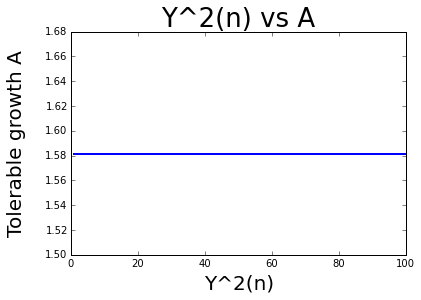

In [133]:
# Probably ignore this

# New Cost Function
# Y^2(n) vs A; Drop Probability = 1 --> Sanity Check (Good!)

D = 0
b = 1 # bits per unit time across channel
code = (D+1)*b # number of bits in code
mu_c = 1
varc = 2**(-2*code)
# sigmax = linspace(1, 10, 100)
# y2n = 0 # try 0
# y2n = (mu_c**2+varc)*sigmax #crazy stuff happens if I do sigmax/1000
y2n = linspace(0, 100, 101)
sigmax = y2n/(mu_c**2+varc)

# alpha = a**2 * mu_c * sigmax / (a**2 * (mu_c**2 + varc) * sigmax + y2n)
alpha = mu_c * sigmax / ((mu_c**2 + varc) * sigmax + y2n)

first = 1
second = -2*mu_c*alpha
third = alpha**2 * (mu_c**2 + varc)
# second = 2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + y2n)
# third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + y2n)**2
res = first+second+third
res = (1/res)**(1/2/(D+1))


plot(y2n,res,linewidth=2.0)
xlabel('Y^2(n)',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)
title('Y^2(n) vs A', fontsize=26)
# savefig('delayvsa.pdf')

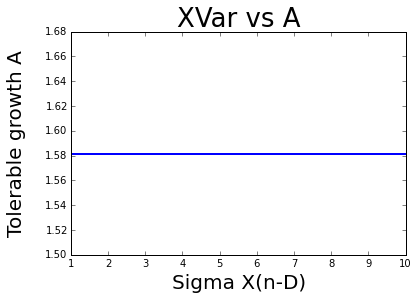

In [129]:
# New Cost Function
# X(n) vs A; Drop Probability = 1 --> Sanity Check

D = 0
b = 1 # bits per unit time across channel
code = (D+1)*b # number of bits in code
mu_c = 1
varc = 2**(-2*code)
sigmax = linspace(1, 10, 100)
# y2n = 0 # try 0
y2n = (mu_c**2+varc)*sigmax #crazy stuff happens if I do sigmax/1000

# alpha = a**2 * mu_c * sigmax / (a**2 * (mu_c**2 + varc) * sigmax + y2n)
alpha = mu_c * sigmax / ((mu_c**2 + varc) * sigmax + y2n)

first = 1
second = -2*mu_c*alpha
third = alpha**2 * (mu_c**2 + varc)
# second = 2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + y2n)
# third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + y2n)**2
res = first+second+third
res = (1/res)**(1/2/(D+1))

# print(sigmax)
#print(res)

figure()
plot(sigmax,res,linewidth=2.0)
xlabel('Sigma X(n-D)',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)

title('XVar vs A', fontsize=26)
# savefig('delayvsa.pdf')

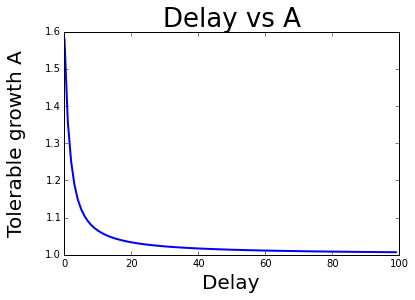

In [121]:
# New Cost Function
# Delay vs A; Drop Probability = 1

# needs work

b = 1 # bits per unit time across channel
mu_c = 1
# sigmax = linspace(1, 10, 10)
first = 1

lst = []
for D in range(100):
    
    code = (D+1)*b # number of bits in code
    varc = 2**(-2*code)
    #y2n = 1 # try 0
#     y2n = (mu_c**2+varc)*sigmax #crazy stuff happens if I do sigmax/1000
    # a = ((mu_c**2 + varc) / varc)**(1/2/(D+1))

#     alpha = a**D * a**2 * mu_c * sigmax / (a**2 * (mu_c**2 + varc) * sigmax + y2n)
#     alpha = mu_c * sigmax / ((mu_c**2 + varc) * sigmax + y2n)
    alpha = mu_c / 2 / (mu_c**2 + varc)
    second = -2*mu_c*alpha
    third = alpha**2 * (mu_c**2 + varc)
#     second = 2*mu_c**2 * sigmax / ((mu_c**2+varc)*sigmax + y2n)
#     third = mu_c**2 * sigmax**2 * (mu_c**2+varc) / ((mu_c**2+varc)*sigmax + y2n)**2
    res = first+second+third
    res = (1/res)**(1/2/(D+1))
    lst.append(res)
#     lst.append(max(res))


figure()
plot(range(100),lst,linewidth=2.0)
xlabel('Delay',fontsize=20), ylabel('Tolerable growth A',fontsize=20, labelpad=20)

title('Delay vs A', fontsize=26)
# savefig('delayvsa.pdf')

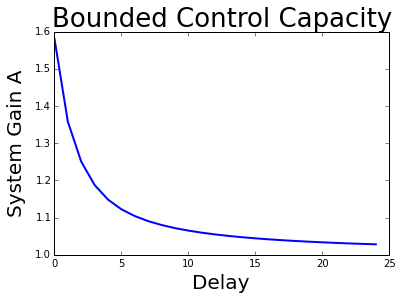

In [10]:
# New Cost Function
# Delay vs A; Drop Probability = 1
# Implementing simplification, alpha = constant through time

# needs work

b = 1 # bits per unit time across channel
mu_c = 1
# sigmax = linspace(1, 10, 10)
first = 1

lst = []
for D in range(25):
    
    code = (D+1)*b # number of bits in code
    varc = 2**(-2*code)

    res = first - 3/4*mu_c**2/(mu_c**2+varc)
    res = (1/res)**(1/2/(D+1))
    lst.append(res)

plot(range(25),lst,linewidth=2.0)
xlabel('Delay',fontsize=20), ylabel('System Gain A',fontsize=20, labelpad=10)

title('Bounded Control Capacity', fontsize=26) # No V(n), Pr(Drop) = 0
# savefig('160131_newcost.pdf', bbox='tight')

In [ ]:
# Understand Tatikonda and compare Tatikonda setup against this setup
# Why does Tatikonda have a upper (tight) bound of 2, when with no v(n) drop = 0 I get upper higher than 2 (looser bound)
# Understand why variance of C is 2^(-2Rm) (rate distortion theory)
# Rate distortion: if N(mu^2, sigma^2) with R quantized bits then error = sigma^2 * 2^(-2R) << sigma^2 came from X
# Adaptive quantizer!

# make simulation with new cost function and see if with simulation bound is tight i.e. values are achievable